In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-dataset/Twitter_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#LOAD THE DATA SET
twitter=pd.read_csv('/kaggle/input/twitter-sentiment-dataset/Twitter_Data.csv')

In [4]:
twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
twitter.shape

(162980, 2)

In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
twitter['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [8]:
labels = pd.get_dummies(twitter.category)
labels.columns = ["negative", "neutral", "positive"]
labels.head()

,negative,neutral,positive
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True


<Axes: xlabel='category', ylabel='count'>

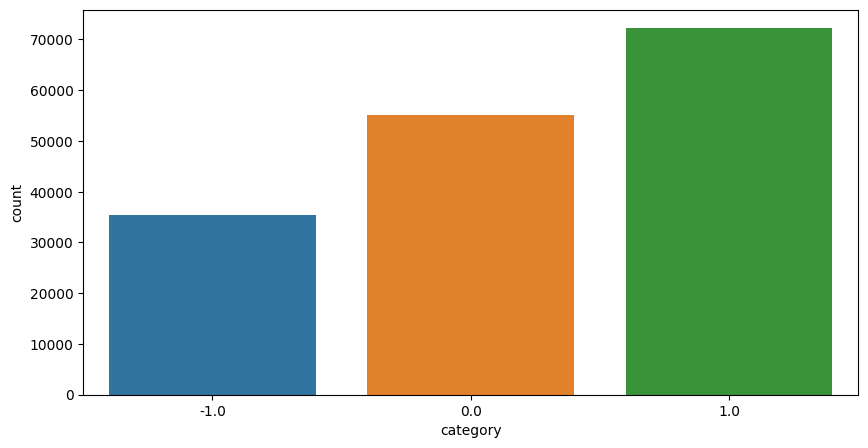

In [9]:
fig1 = plt.figure(figsize=(10,5))
sns.countplot(x="category",data=twitter)

<Axes: >

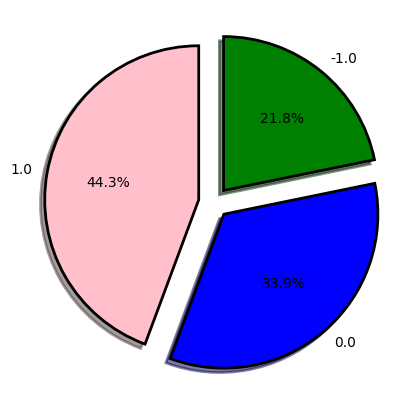

In [10]:
fig2 = plt.figure(figsize=(5,5))
colors = ("pink", "blue", "green")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = twitter['category'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')


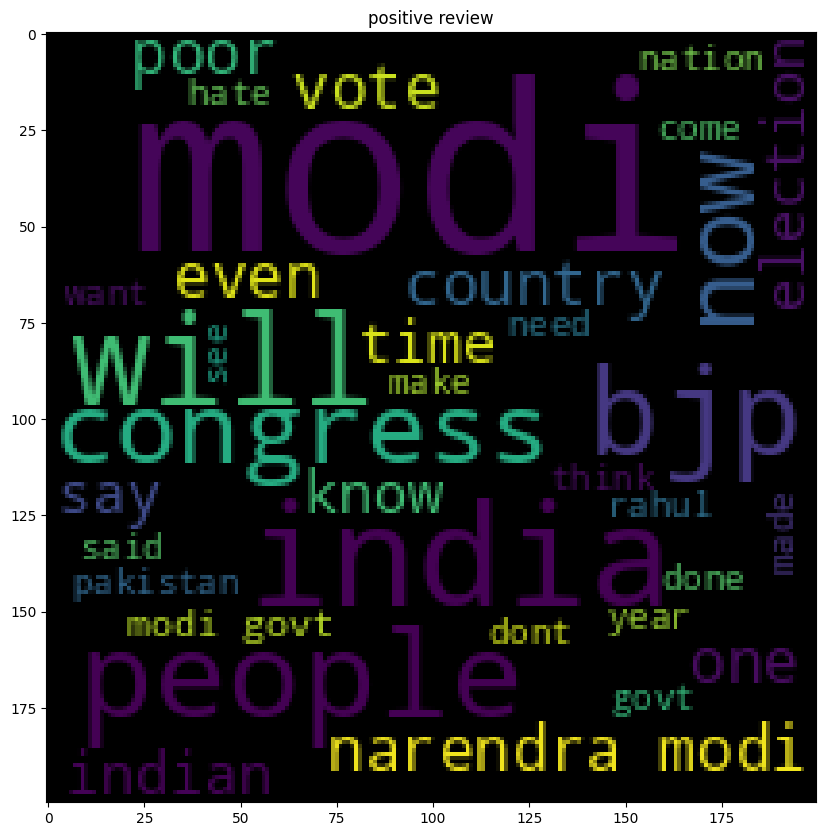

In [11]:
wc = WordCloud(width = 200, height = 200, min_font_size = 8, background_color = 'black')
positive_wc = wc.generate(twitter[twitter['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(twitter[twitter['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(twitter[twitter['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (10, 10))
plt.title('positive review')
plt.imshow(positive_wc)

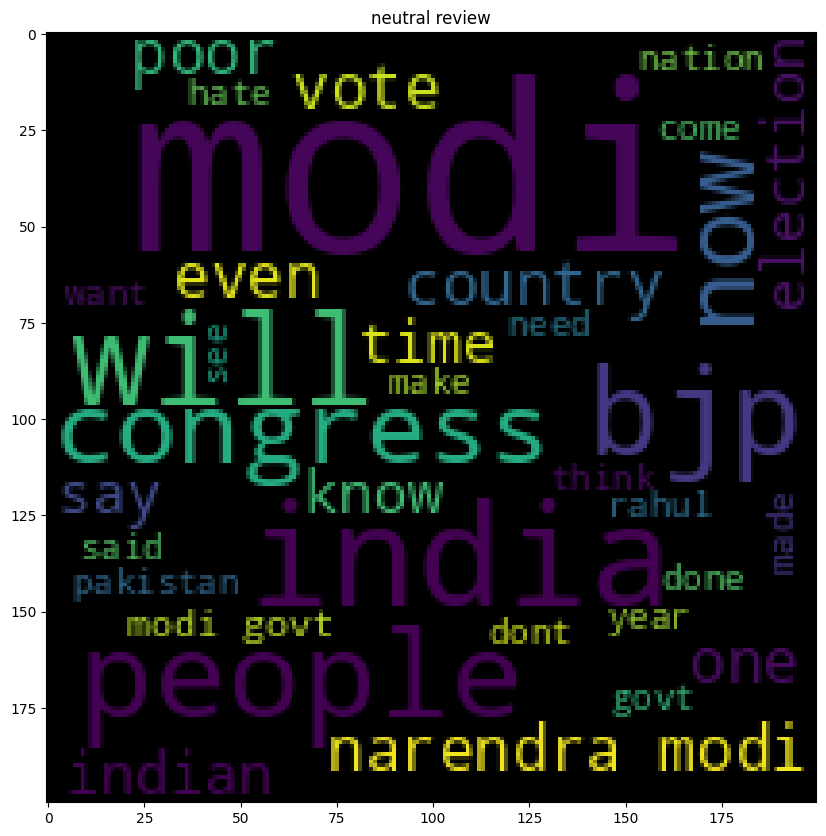

In [12]:
plt.figure(figsize = (10, 10))
plt.title('neutral review')
plt.imshow(neutral_wc)

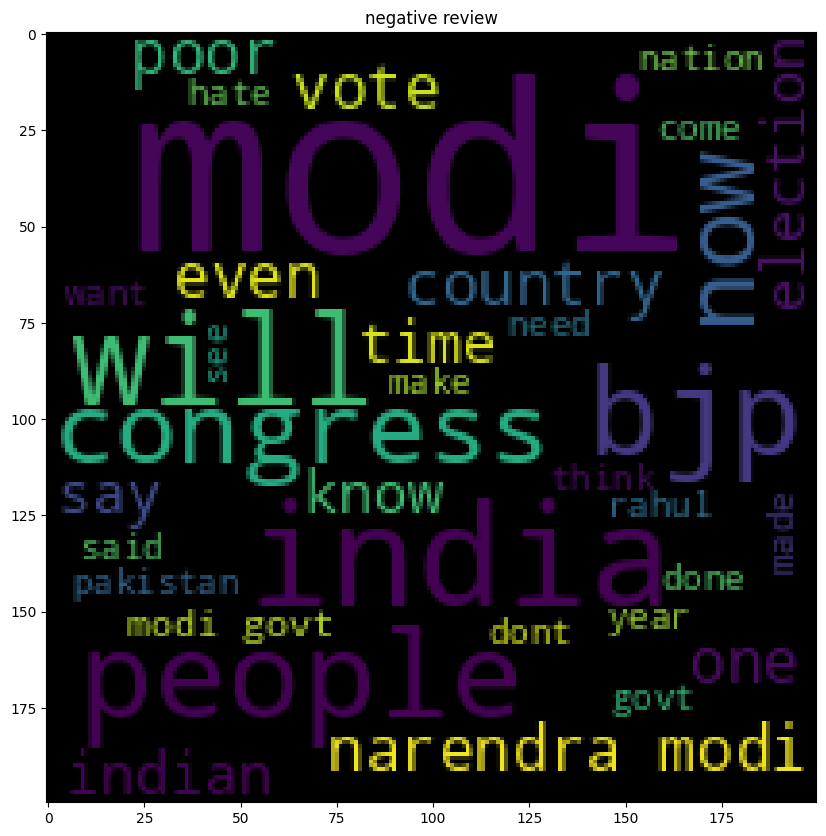

In [13]:
plt.figure(figsize = (10, 10))
plt.title('negative review')
plt.imshow(negative_wc)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [15]:
X = twitter['clean_text'].values.astype('U')
y = twitter['category'].values.astype('U')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [16]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])
L = LabelEncoder()


In [17]:
# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [18]:
y_pred = pipeline.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
plt.show()

Accuracy: 0.57


In [20]:

print(confusion_matrix(y_pred, y_test))
plt.show()

[[  715    14    10     0]
 [  174  3624   113     0]
 [ 6213  7405 14327     1]
 [    0     0     0     0]]
